In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn

In [3]:
data=pd.read_csv('income1.csv')

Text(0, 0.5, 'income')

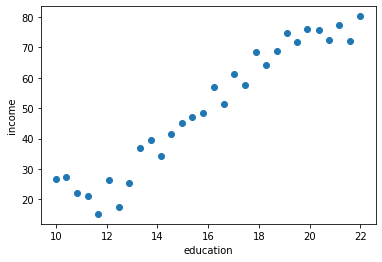

In [4]:
plt.scatter(data.Education,data.Income)
plt.xlabel('education')
plt.ylabel('income')

In [5]:
X=torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))

In [6]:
Y=torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

In [7]:
model1=nn.Linear(1,1)

In [8]:
model2=nn.Linear(1,1)

In [9]:
loss_fn=nn.MSELoss()

In [10]:
opt=torch.optim.SGD(model1.parameters(),lr=0.0001)

In [11]:
for epoch in range(5000):
    for x,y in zip(X,Y):
        y_pred=model1(x)
        loss=loss_fn(y,y_pred)
        opt.zero_grad()
        loss.backward()
        opt.step()

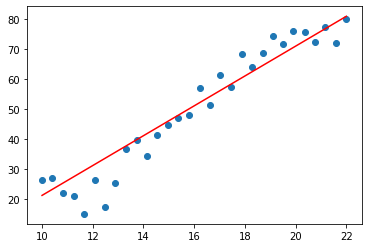

In [12]:
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),model1(X).data.numpy(),c='r')

In [15]:
model1.bias,model1.weight

(Parameter containing:
 tensor([-28.3910], requires_grad=True),
 Parameter containing:
 tensor([[4.9757]], requires_grad=True))

In [11]:
opt2=torch.optim.SGD(model2.parameters(),lr=0.0001)

In [12]:
for i in range(100):
    for x,y in zip(X,Y):
        y_pred=model2(x)
        loss=loss_fn(y,y_pred)
        opt2.zero_grad()
        loss.backward()
        opt2.step()

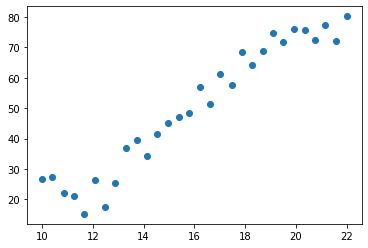

In [68]:
plt.plot(X.numpy(),model2(X).data.numpy(),c='g')
plt.scatter(data.Education,data.Income)
plt.plot(X.numpy(),model1(X).data.numpy(),c='r')